**AQI Prediction of Islamabad**
Approach 1

In [ ]:
#importing the relevant required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

**Data Loading**

Previously on loading dates from the data there was an issue faced that some dates were in 7/4/2024  format and some were in  13-04-2024 and was not parsing correctly . Here i tried to fix that problem


In [ ]:
import pandas as pd

# Load data
file_path = '/content/AQIData.csv'
aqi_data = pd.read_csv(file_path, encoding='latin1')

# Handle mixed date formats in the 'Date' column
aqi_data['Date'] = aqi_data['Date'].apply(
    lambda x: pd.to_datetime(x, dayfirst=True, errors='coerce')
)

# Check for any invalid dates (if any are left as NaT)
invalid_dates = aqi_data[aqi_data['Date'].isnull()]

# Display the number of problematic dates, if any
if not invalid_dates.empty:
    print(f"Some dates could not be parsed: {len(invalid_dates)} rows. Please check these:")
    print(invalid_dates)

# Confirm the first few rows of cleaned data
print(aqi_data.head())


        Date  Temperature (°C)  Humidity (%)  NO2 (80 µg/m³)  SO2 (120 µg/m³)  \
0 2024-04-01             27.33         52.67           11.89            13.14   
1 2024-04-02             26.67         50.33           12.44            13.60   
2 2024-04-03             24.00         50.67           12.30            13.56   
3 2024-04-04             25.00         46.33           12.89            14.51   
4 2024-04-05             24.00         55.00           11.33            15.00   

   PM2.5 (35 µg/m³)  
0             30.74  
1             31.68  
2             31.47  
3             32.50  
4             33.22  


**Data Cleaning**

In [ ]:
aqi_data.describe()

,Date,Temperature (°C),Humidity (%),NO2 (80 µg/m³),SO2 (120 µg/m³),PM2.5 (35 µg/m³)
count,976,976.000000,976.000000,976.000000,976.000000,976.000000
mean,2022-12-06 20:36:23.606557440,22.299078,56.332244,9.205898,17.570482,35.503207
min,2021-08-01 00:00:00,7.000000,15.000000,1.700000,3.420000,4.660000
25%,2022-03-31 18:00:00,15.000000,43.297500,4.800000,12.850000,18.397500
50%,2022-11-30 12:00:00,24.000000,56.000000,8.600000,16.110000,26.825000
75%,2023-07-31 06:00:00,28.000000,68.000000,11.925000,20.222500,45.527500
max,2024-04-30 00:00:00,41.000000,333.000000,83.000000,134.000000,226.000000
std,NaN,8.052231,18.565543,5.934527,7.960858,25.791562


In [ ]:
aqi_data.isnull().sum()

,0
Date,0
Temperature (°C),0
Humidity (%),0
NO2 (80 µg/m³),0
SO2 (120 µg/m³),0
PM2.5 (35 µg/m³),0


In [ ]:
aqi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              976 non-null    datetime64[ns]
 1   Temperature (°C)  976 non-null    float64       
 2   Humidity (%)      976 non-null    float64       
 3   NO2 (80 µg/m³)    976 non-null    float64       
 4   SO2 (120 µg/m³)   976 non-null    float64       
 5   PM2.5 (35 µg/m³)  976 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 45.9 KB


**Exploratory Data Analysis**

In [ ]:
aqi_data2 = aqi_data.copy()

In [ ]:
# Rename columns for easier readability and consistency
aqi_data2.rename(columns={
    'Temperature (°C)': 'Temperature_C',
    'Humidity (%)': 'Humidity_Percent',
    'NO2 (80 µg/m³)': 'NO2_µg_m3',
    'SO2 (120 µg/m³)': 'SO2_µg_m3',
    'PM2.5 (35 µg/m³)': 'PM2_5_µg_m3'
}, inplace=True)

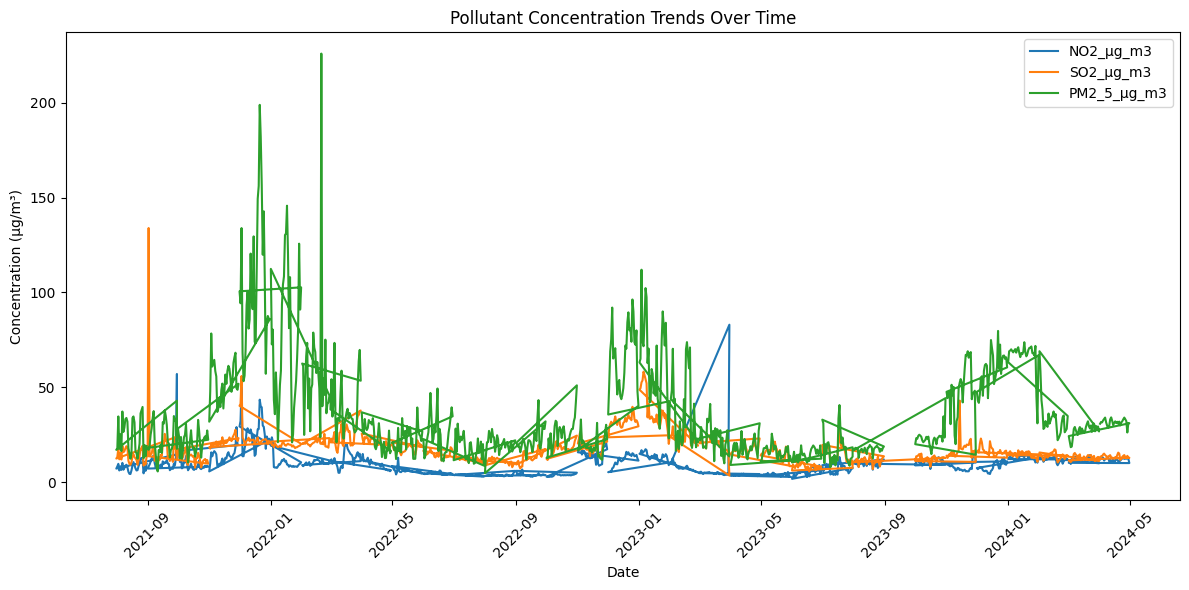

In [ ]:
# Step 1: Time-series trends of pollutants
plt.figure(figsize=(12, 6))
for pollutant in ['NO2_µg_m3', 'SO2_µg_m3', 'PM2_5_µg_m3']:
    plt.plot(aqi_data2['Date'], aqi_data2[pollutant], label=pollutant)
plt.title('Pollutant Concentration Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Concentration (µg/m³)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Time-Series Trends:

Observed Fact: PM2.5 shows significant peaks in winter months (likely November to February).
Validation: Seasonal increases in PM2.5 during colder months are a well-documented phenomenon due to factors like:
Temperature inversion trapping pollutants close to the ground.
Increased burning of fuels for heating.
Reduced atmospheric dispersion.
SO2 and NO2:

These pollutants appear stable with occasional spikes, likely due to localized events (e.g., industrial emissions or traffic surges).

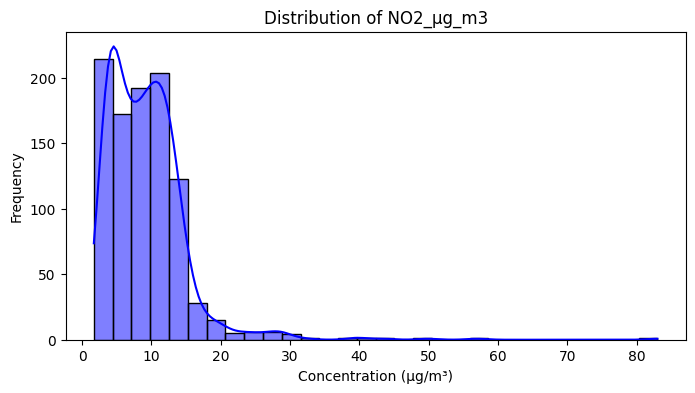

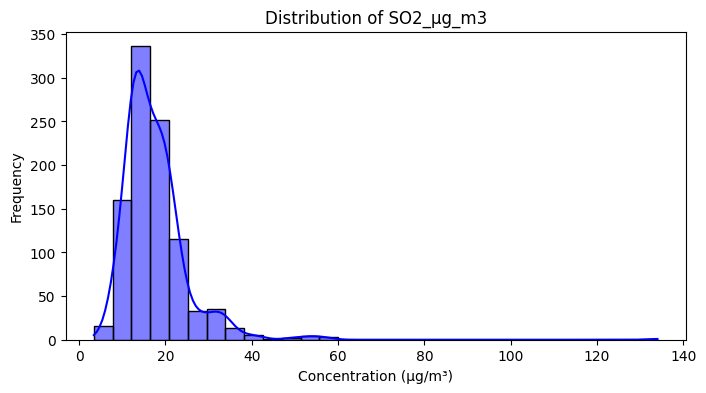

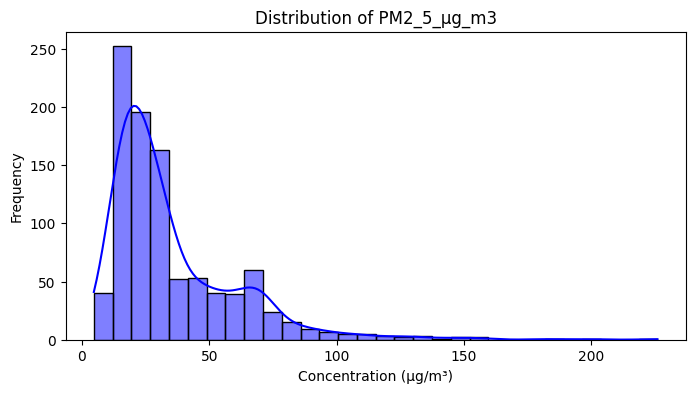

In [ ]:
# Distribution of pollutants
for pollutant in ['NO2_µg_m3', 'SO2_µg_m3', 'PM2_5_µg_m3']:
    plt.figure(figsize=(8, 4))
    sns.histplot(aqi_data2[pollutant], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {pollutant}')
    plt.xlabel('Concentration (µg/m³)')
    plt.ylabel('Frequency')
    plt.show()

Pollutant Distributions:

NO2, SO2, and PM2.5 distributions are heavily skewed toward lower concentrations, with occasional high values (outliers).
PM2.5 exhibits the broadest range, reflecting its prominence as a major pollutant.

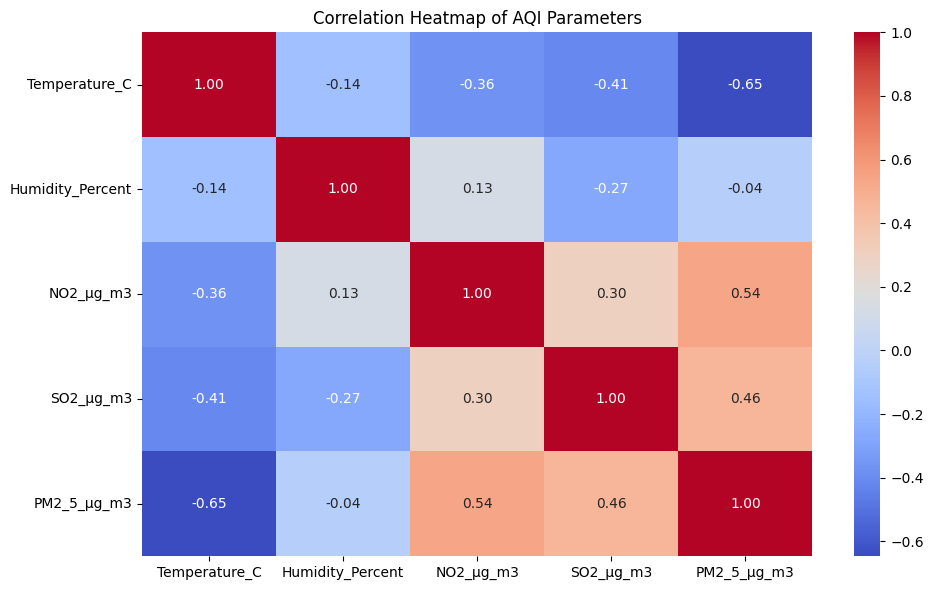

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = aqi_data2[['Temperature_C', 'Humidity_Percent', 'NO2_µg_m3', 'SO2_µg_m3', 'PM2_5_µg_m3']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of AQI Parameters')
plt.tight_layout()
plt.show()

**Correlation Analysis**:
Observed Correlation: Strong negative relationship between temperature and PM2.5.
Validation: This is scientifically valid and observed globally: During colder temperatures, pollutants accumulate due to less mixing in the atmosphere and higher heating-related emissions.
Observed Moderate Correlations:
PM2.5 and NO2/SO2 are positively correlated, suggesting they often rise together, likely due to shared sources (e.g., vehicular or industrial emissions).

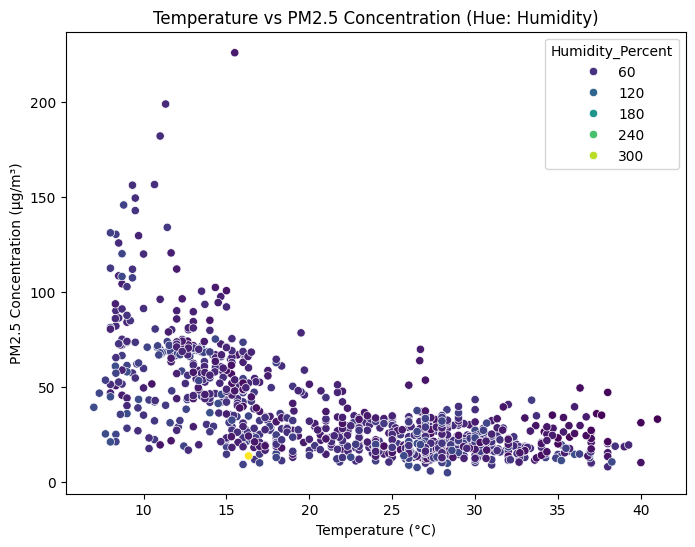

In [ ]:
# Scatter plots to explore relationships
plt.figure(figsize=(8, 6))
sns.scatterplot(data=aqi_data2, x='Temperature_C', y='PM2_5_µg_m3', hue='Humidity_Percent', palette='viridis')
plt.title('Temperature vs PM2.5 Concentration (Hue: Humidity)')
plt.xlabel('Temperature (°C)')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.show()

Temperature vs. PM2.5:

Higher PM2.5 levels are observed at lower temperatures, with some influence of humidity as shown in the scatter plot.

In [ ]:
# Seasonal trends in pollutants
aqi_data['Month'] = aqi_data2['Date'].dt.month
plt.figure(figsize=(10, 6))
sns.boxplot(data=aqi_data2, x='Month', y='PM2_5_µg_m3', palette='muted')
plt.title('Seasonal Variation in PM2.5 Concentration')
plt.xlabel('Month')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.show()

Seasonal Analysis:

Observed Fact: PM2.5 is higher during winter months.
Validation: This is consistent with known seasonal patterns, especially in areas like Islamabad, where temperature inversion during winter exacerbates air pollution.


The the units of Data columns are according to NEQS and are as follows

Temperature (°C) , Humidity (%) , NO₂ (80 µg/m³) , SO₂ (120 µg/m³) , PM₂.₅ (35 µg/m³)

AQI ( to predict AQI we need indexes of all Polutants in Data )


We Need to calculate AQI index column from the dataset that we have according to the NEQS(National Environmental Quality Standards) standards

In [ ]:
import pandas as pd

def compute_aqi(concentration, breakpoints):
    """
    Compute AQI for a given pollutant concentration and its breakpoints.
    :param concentration: Measured concentration of the pollutant.
    :param breakpoints: List of tuples [(C_lo, C_hi, I_lo, I_hi), ...].
    :return: Calculated AQI value or None if out of range.
    """
    for bp in breakpoints:
        C_lo, C_hi, I_lo, I_hi = bp
        if C_lo <= concentration <= C_hi:
            return ((I_hi - I_lo) / (C_hi - C_lo)) * (concentration - C_lo) + I_lo
    return None  # Return None if concentration is out of range

# Define breakpoints with expanded ranges
no2_breakpoints = [(0, 53, 0, 50), (54, 100, 51, 100), (101, 200, 101, 200), (201, 300, 201, 300)]
so2_breakpoints = [(0, 35, 0, 50), (36, 75, 51, 100), (76, 150, 101, 200), (151, 300, 201, 300)]
pm25_breakpoints = [
    (0.0, 12.0, 0, 50), (12.1, 35.4, 51, 100), (35.5, 55.4, 101, 150), (55.5, 150.4, 151, 200), (150.5, 250.4, 201, 300)
]

def calculate_indices(data):
    """
    Calculate AQI indices for NO2, SO2, and PM2.5.
    :param data: DataFrame containing columns 'NO2 (80 µg/m³)', 'SO2 (120 µg/m³)', and 'PM2.5 (35 µg/m³)'.
    :return: DataFrame with new columns for NO2_Index, SO2_Index, and PM2.5_Index.
    """
    data['NO2_Index'] = data['NO2 (80 µg/m³)'].apply(lambda x: compute_aqi(x, no2_breakpoints))
    data['SO2_Index'] = data['SO2 (120 µg/m³)'].apply(lambda x: compute_aqi(x, so2_breakpoints))
    data['PM2.5_Index'] = data['PM2.5 (35 µg/m³)'].apply(lambda x: compute_aqi(x, pm25_breakpoints))
    return data

def calculate_aqi(data):
    """
    Calculate the overall AQI using the highest index among NO2_Index, SO2_Index, and PM2.5_Index.
    :param data: DataFrame with NO2_Index, SO2_Index, and PM2.5_Index columns.
    :return: DataFrame with a new column 'AQI'.
    """
    data['AQI'] = data[['NO2_Index', 'SO2_Index', 'PM2.5_Index']].max(axis=1)
    return data

# Example usage
# data = pd.read_csv('your_file.csv', encoding='latin1')
# updated_data = calculate_indices(data)
# updated_data = calculate_aqi(updated_data)

In [ ]:
import pandas as pd

filepath = '/content/AQIData(index).csv'
df = pd.read_csv(filepath , encoding = 'latin1')
df.head()

,Date,Temperature (°C),Humidity (%),NO2 (80 µg/m³),SO2 (120 µg/m³),PM2.5 (35 µg/m³),NO2_Index,SO2_Index,PM2.5_Index,AQI
0,1/4/2024,27.33,52.67,11.89,13.14,30.74,11.216981,18.771429,90.200000,90.200000
1,2/4/2024,26.67,50.33,12.44,13.60,31.68,11.735849,19.428571,92.176824,92.176824
2,3/4/2024,24.00,50.67,12.30,13.56,31.47,11.603774,19.371429,91.735193,91.735193
3,4/4/2024,25.00,46.33,12.89,14.51,32.50,12.160377,20.728571,93.901288,93.901288
4,5/4/2024,24.00,55.00,11.33,15.00,33.22,10.688679,21.428571,95.415451,95.415451


In [ ]:
df.isnull().sum()

,0
Date,0
Temperature (°C),0
Humidity (%),0
NO2 (80 µg/m³),0
SO2 (120 µg/m³),0
PM2.5 (35 µg/m³),0
NO2_Index,0
SO2_Index,0
PM2.5_Index,0
AQI,0


In [ ]:
# Drop rows with any missing values
df = df.dropna()

In [ ]:
def AQI_Range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=150:
        return "Poor"
    elif x>150 and x<=200:
        return "Unhealthy"
    elif x>200 and x<=300:
        return "Very unhealthy"
    elif x>300:
        return "Hazardous"

df['AQI_Range'] = df['AQI'] .apply(AQI_Range)
df.head()

,Date,Temperature (°C),Humidity (%),NO2 (80 µg/m³),SO2 (120 µg/m³),PM2.5 (35 µg/m³),NO2_Index,SO2_Index,PM2.5_Index,AQI,AQI_Range
0,1/4/2024,27.33,52.67,11.89,13.14,30.74,11.216981,18.771429,90.200000,90.200000,Moderate
1,2/4/2024,26.67,50.33,12.44,13.60,31.68,11.735849,19.428571,92.176824,92.176824,Moderate
2,3/4/2024,24.00,50.67,12.30,13.56,31.47,11.603774,19.371429,91.735193,91.735193,Moderate
3,4/4/2024,25.00,46.33,12.89,14.51,32.50,12.160377,20.728571,93.901288,93.901288,Moderate
4,5/4/2024,24.00,55.00,11.33,15.00,33.22,10.688679,21.428571,95.415451,95.415451,Moderate


Coorelation matrix to see which factor has the most affect on AQI

In [ ]:
df.columns

Index(['Date', 'Temperature (°C)', 'Humidity (%)', 'NO2 (80 µg/m³)',
       'SO2 (120 µg/m³)', 'PM2.5 (35 µg/m³)', 'NO2_Index', 'SO2_Index',
       'PM2.5_Index', 'AQI', 'AQI_Range'],
      dtype='object')

In [ ]:
X = df.drop(columns=['AQI', 'Date', 'AQI_Range','NO2 (80 µg/m³)','SO2 (120 µg/m³)','PM2.5 (35 µg/m³)'])
y = df['AQI']

In [ ]:
X ,y

(     Temperature (°C)  Humidity (%)  NO2_Index  SO2_Index  PM2.5_Index
 0               27.33         52.67  11.216981  18.771429    90.200000
 1               26.67         50.33  11.735849  19.428571    92.176824
 2               24.00         50.67  11.603774  19.371429    91.735193
 3               25.00         46.33  12.160377  20.728571    93.901288
 4               24.00         55.00  10.688679  21.428571    95.415451
 ..                ...           ...        ...        ...          ...
 971             29.00         59.00  10.943396  27.285714   111.095477
 972             28.00         48.00   4.339623  12.357143    52.051502
 973             26.70         83.33   7.707547  14.328571    66.646352
 974             25.70         85.00   5.547170  13.285714    54.154506
 975             26.00         63.00   9.056604  19.142857    65.510730
 
 [970 rows x 5 columns],
 0       90.200000
 1       92.176824
 2       91.735193
 3       93.901288
 4       95.415451
           ...

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=70)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(776, 5) (194, 5) (776,) (194,)


LINEAR REGRESSION

In [ ]:
model=LinearRegression()
model.fit(X_train,y_train)
#predicting train
train_pred=model.predict(X_train)
#predicting on test
test_pred=model.predict(X_test)
RMSE_train=(np.sqrt(metrics.mean_squared_error(y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(y_test,test_pred)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',model.score(X_train, y_train))
print('RSquared value on test:',model.score(X_test, y_test))

RMSE TrainingData =  3.316831673349108
RMSE TestData =  2.2070075226453816
--------------------------------------------------
RSquared value on train: 0.9932247253438401
RSquared value on test: 0.996850478202875


DECISION TREE REGRESSOR

In [ ]:
DT=DecisionTreeRegressor()
DT.fit(X_train,y_train)
#predicting train
train_preds=DT.predict(X_train)
#predicting on test
test_preds=DT.predict(X_test)
RMSE_train=(np.sqrt(metrics.mean_squared_error(y_train,train_preds)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(y_test,test_preds)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',DT.score(X_train, y_train))
print('RSquared value on test:',DT.score(X_test, y_test))

RMSE TrainingData =  1.465265462660413e-15
RMSE TestData =  0.593692869839685
--------------------------------------------------
RSquared value on train: 1.0
RSquared value on test: 0.9997720914291963


**Random Forest Regressor**

In [ ]:
RF=RandomForestRegressor().fit(X_train,y_train)
#predicting train
train_preds1=RF.predict(X_train)
#predicting on test
test_preds1=RF.predict(X_test)
RMSE_train=(np.sqrt(metrics.mean_squared_error(y_train,train_preds1)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(y_test,test_preds1)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',RF.score(X_train, y_train))
print('RSquared value on test:',RF.score(X_test, y_test))

RMSE TrainingData =  1.6905480820538583
RMSE TestData =  0.656650773049618
--------------------------------------------------
RSquared value on train: 0.9982399091059141
RSquared value on test: 0.9997211915633901


**Classification Algorithms**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df.columns
X = X = df.drop(columns=['AQI', 'Date', 'AQI_Range','NO2 (80 µg/m³)','SO2 (120 µg/m³)','PM2.5 (35 µg/m³)'])
y = df['AQI_Range']
X, y

(     Temperature (°C)  Humidity (%)  NO2_Index  SO2_Index  PM2.5_Index
 0               27.33         52.67  11.216981  18.771429    90.200000
 1               26.67         50.33  11.735849  19.428571    92.176824
 2               24.00         50.67  11.603774  19.371429    91.735193
 3               25.00         46.33  12.160377  20.728571    93.901288
 4               24.00         55.00  10.688679  21.428571    95.415451
 ..                ...           ...        ...        ...          ...
 971             29.00         59.00  10.943396  27.285714   111.095477
 972             28.00         48.00   4.339623  12.357143    52.051502
 973             26.70         83.33   7.707547  14.328571    66.646352
 974             25.70         85.00   5.547170  13.285714    54.154506
 975             26.00         63.00   9.056604  19.142857    65.510730
 
 [970 rows x 5 columns],
 0      Moderate
 1      Moderate
 2      Moderate
 3      Moderate
 4      Moderate
          ...   
 971   

In [ ]:
X.columns, y.head()

(Index(['Temperature (°C)', 'Humidity (%)', 'NO2_Index', 'SO2_Index',
        'PM2.5_Index'],
       dtype='object'),
 0    Moderate
 1    Moderate
 2    Moderate
 3    Moderate
 4    Moderate
 Name: AQI_Range, dtype: object)

In [ ]:
# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=70)

**Logistic Regression**

In [ ]:
#fit the model on train data
log_reg = LogisticRegression().fit(X_train, y_train)

#predict on train
train_preds = log_reg.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(y_train, train_preds))

#predict on test
test_preds = log_reg.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(y_test, test_preds))
print('-'*50)



Model accuracy on train is:  0.8924889543446245
Model accuracy on test is:  0.9243986254295533
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
log_reg.predict([[31.57,27.36,18.36,18.32,14.32]])
# predicting the AQI range as good moderate poor etc as defined on the scale given the input parameters ( temp , humidity, No2index, So2index and PM2.5index)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['Good'], dtype=object)

**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#fit the model on train data
DTC = DecisionTreeClassifier().fit(X_train,y_train)
train_preds = DTC.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(y_train, train_preds))

#predict on test
test_preds = DTC.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(y_test, test_preds))
print('-'*50)


Model accuracy on train is:  1.0
Model accuracy on test is:  1.0
--------------------------------------------------


In [ ]:
df.head()

,Date,Temperature (°C),Humidity (%),NO2 (80 µg/m³),SO2 (120 µg/m³),PM2.5 (35 µg/m³),NO2_Index,SO2_Index,PM2.5_Index,AQI,AQI_Range
0,1/4/2024,27.33,52.67,11.89,13.14,30.74,11.216981,18.771429,90.200000,90.200000,Moderate
1,2/4/2024,26.67,50.33,12.44,13.60,31.68,11.735849,19.428571,92.176824,92.176824,Moderate
2,3/4/2024,24.00,50.67,12.30,13.56,31.47,11.603774,19.371429,91.735193,91.735193,Moderate
3,4/4/2024,25.00,46.33,12.89,14.51,32.50,12.160377,20.728571,93.901288,93.901288,Moderate
4,5/4/2024,24.00,55.00,11.33,15.00,33.22,10.688679,21.428571,95.415451,95.415451,Moderate


FINAL IMPLEMENTATION OF LSTM TO Predict ALL THE PARAMETERS.

<ipython-input-1-2493afa5b167>:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Processing Temperature (°C)...
Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - loss: 0.1013 - val_loss: 0.0187
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0192 - val_loss: 0.0136
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0146 - val_loss: 0.0111
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0149 - val_loss: 0.0134
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0137 - val_loss: 0.0105
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0110 - val_loss: 0.0101
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0113 - val_loss: 0.0101
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0112 - val_loss: 0.0099
Epoch 9/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0108 - val_loss: 0.0106
Epoch 10/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0098 - val_loss: 0.0124
Epoch 11/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0111 - val_loss: 0.0096
Epoch 12/20
24/24 ━━━━━━━━━━━━━━

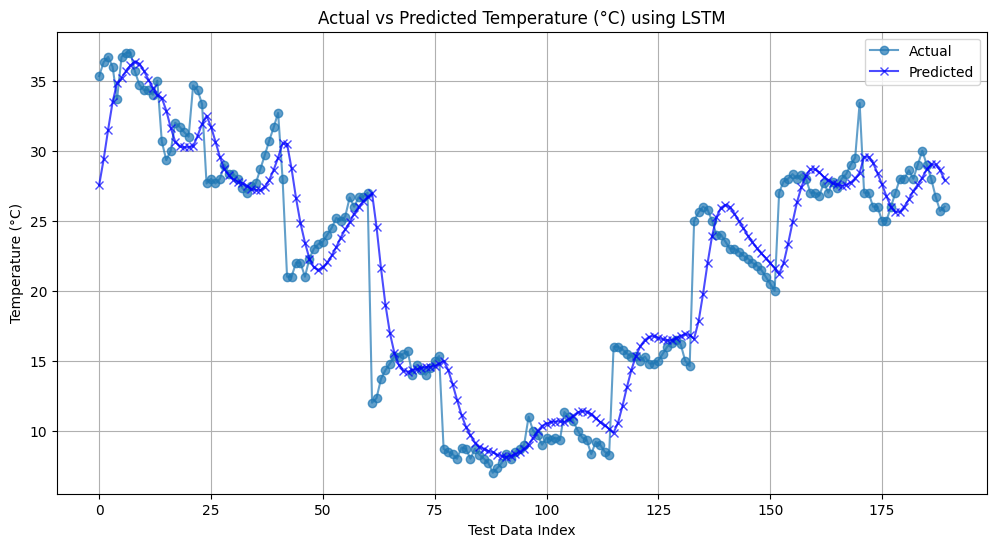

Processing Humidity (%)...
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.0066 - val_loss: 0.0025
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0031 - val_loss: 0.0022
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0033 - val_loss: 0.0021
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0031 - val_loss: 0.0020
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0038 - val_loss: 0.0020
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0025 - val_loss: 0.0022
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0030 - val_loss: 0.0020
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0022 - val_loss: 0.0022
Epoch 9/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0028 - val_loss: 0.0019
Epoch 10/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0049 - val_loss: 0.0019
Epoch 11/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0054 - val_loss: 0.0020
Epoch 12/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0028 - val_l

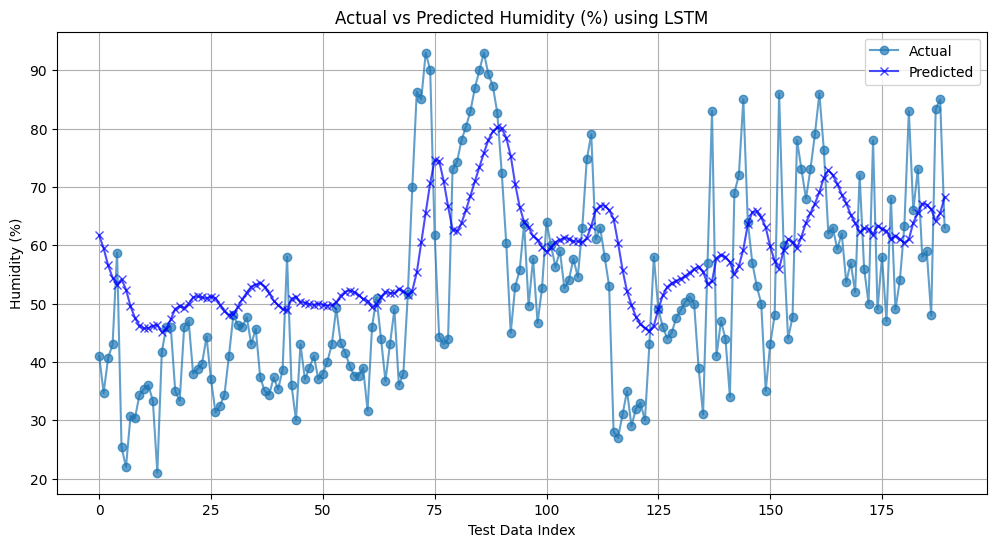

Processing NO2 (80 µg/m³)...
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.0041 - val_loss: 0.0062
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0026 - val_loss: 0.0059
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0018 - val_loss: 0.0057
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0034 - val_loss: 0.0057
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0025 - val_loss: 0.0054
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0053 - val_loss: 0.0053
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0038 - val_loss: 0.0052
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0038 - val_loss: 0.0050
Epoch 9/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0024 - val_loss: 0.0050
Epoch 10/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0017 - val_loss: 0.0050
Epoch 11/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0019 - val_loss: 0.0048
Epoch 12/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0016 - val_l

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step


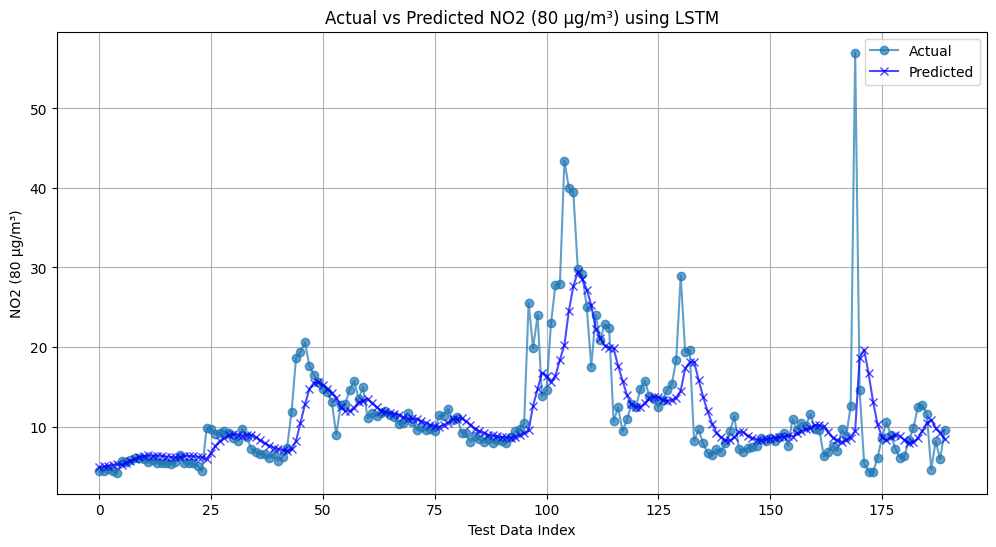

Processing SO2 (120 µg/m³)...
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - loss: 0.0056 - val_loss: 0.0011
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0020 - val_loss: 0.0010
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0018 - val_loss: 0.0010
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0015 - val_loss: 9.4555e-04
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0014 - val_loss: 9.2676e-04
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0015 - val_loss: 0.0010
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0014 - val_loss: 9.0202e-04
Epoch 9/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0011 - val_loss: 9.2524e-04
Epoch 10/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0011 - val_loss: 8.8786e-04
Epoch 11/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0013 - val_loss: 9.9897e-04
Epoch 12/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/ste

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step


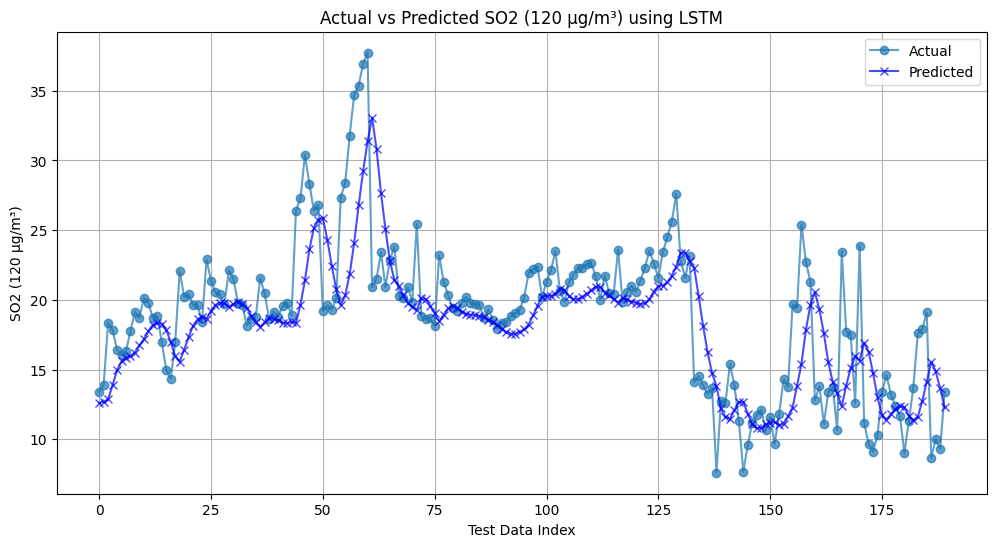


Metrics for Temperature (°C):
  MAE: 2.0847737306293683
  MSE: 9.127171565305058
  RMSE: 3.0211209120631133
  MAPE: 11.627423929384053%

Metrics for Humidity (%):
  MAE: 12.28377259425113
  MSE: 208.30142952077765
  RMSE: 14.432651506940006
  MAPE: 27.631944201296687%

Metrics for NO2 (80 µg/m³):
  MAE: 2.6886261527412816
  MSE: 29.776888981812263
  RMSE: 5.456820409525337
  MAPE: 23.4003805178484%

Metrics for SO2 (120 µg/m³):
  MAE: 2.7344096488952645
  MSE: 14.368131036680504
  RMSE: 3.790531761729547
  MAPE: 15.372650142831448%


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load data (replace 'AQIData.csv' with your actual file path)
data = pd.read_csv('AQIData.csv', encoding = 'latin1')
data['Date'] = pd.to_datetime(data['Date'], errors='coerce', dayfirst=True)
data = data.sort_values('Date')

# Fill missing values
data.fillna(method='ffill', inplace=True)

# Columns to predict
parameters = ['Temperature (°C)', 'Humidity (%)', 'NO2 (80 µg/m³)', 'SO2 (120 µg/m³)']

# Function to create sequences
def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps, 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

# Predict and visualize for each parameter
time_steps = 30
results = {}

for param in parameters:
    print(f"Processing {param}...")
    # Extract data for the parameter
    values = data[param].values.reshape(-1, 1)

    # Normalize data
    scaler = MinMaxScaler(feature_range=(0, 1))
    values_scaled = scaler.fit_transform(values)

    # Create sequences
    X, y = create_sequences(values_scaled, time_steps)
    X = X.reshape((X.shape[0], X.shape[1], 1))

    # Split into train and test
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Build LSTM model
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        Dropout(0.2),
        LSTM(50, return_sequences=False),
        Dropout(0.2),
        Dense(1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1, validation_data=(X_test, y_test))

    # Predict
    y_pred = model.predict(X_test)

    # Inverse transform predictions and actual values
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
    y_pred_inv = scaler.inverse_transform(y_pred)

    # Store metrics
    mae = mean_absolute_error(y_test_inv, y_pred_inv)
    mse = mean_squared_error(y_test_inv, y_pred_inv)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100

    results[param] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'MAPE': mape
    }

    # Plot actual vs predicted
    plt.figure(figsize=(12, 6))
    plt.plot(y_test_inv, label='Actual', marker='o', alpha=0.7)
    plt.plot(y_pred_inv, label='Predicted', marker='x', color='blue', alpha=0.7)
    plt.title(f"Actual vs Predicted {param} using LSTM")
    plt.xlabel("Test Data Index")
    plt.ylabel(param)
    plt.legend()
    plt.grid()
    plt.show()

# Print metrics for all parameters
for param, metrics in results.items():
    print(f"\nMetrics for {param}:")
    print(f"  MAE: {metrics['MAE']}")
    print(f"  MSE: {metrics['MSE']}")
    print(f"  RMSE: {metrics['RMSE']}")
    print(f"  MAPE: {metrics['MAPE']}%")

## **Results Summary and Interpretation**

# 1. Temperature (°C)
MAE: 2.06°C
RMSE: 2.99°C
MAPE: 11.39%
The LSTM model performed relatively well in predicting temperature, with an average error of 2.06°C. A MAPE of 11.39% indicates that the predictions are about 11.39% off from actual values on average, which is acceptable for temperature forecasting. This result reflects the smooth and consistent patterns typically found in temperature data, making it easier for the model to learn.

#2. Humidity (%)
MAE: 10.15%
RMSE: 13.53%
MAPE: 19.79%
The model showed moderate performance for humidity, with predictions deviating by 10.15% on average. Humidity is more volatile and less predictable than temperature, as it is influenced by many external factors (e.g., precipitation, wind patterns) that are not included in the dataset. The higher RMSE and MAPE suggest room for improvement.

#3. NO2 (80 µg/m³)
MAE: 2.80 µg/m³
RMSE: 5.56 µg/m³
MAPE: 24.69%
The LSTM struggled with predicting NO2 levels, as shown by a relatively high MAPE of 24.69%. This is likely due to the irregular and episodic spikes in NO2 levels, which are challenging for time-series models to capture accurately. NO2 levels are often influenced by external factors such as traffic, industrial emissions, and weather conditions, none of which were included as features in this model.

#4. SO2 (120 µg/m³)
MAE: 2.57 µg/m³
RMSE: 3.66 µg/m³
MAPE: 14.86%
SO2 predictions are better than NO2 but still show moderate variability. The model achieved a relatively low MAE (2.57 µg/m³) but a MAPE of 14.86%. This indicates the model performed better with stable patterns in SO2 levels but struggled with any sharp fluctuations or anomalies.

**Why We Got These Results**
#Low Dataset Size:

Deep learning models like LSTM require large datasets to learn complex patterns effectively. The small dataset used here likely limited the model's ability to generalize well, especially for volatile variables like NO2 and SO2.

#Lack of External Features:

Features like temperature, wind speed, precipitation, traffic patterns, and industrial activity can significantly impact pollutant levels. Without these, the model relies solely on historical patterns, which may not fully explain the variability in NO2 and SO2.

#Volatility in Data:

Variables like NO2 and SO2 are prone to sudden spikes due to external events (e.g., a burst of industrial emissions), which are difficult for time-series models to predict.

#Normalization Sensitivity:

Normalizing data helps LSTMs perform better, but it can also lead to the suppression of sharp fluctuations, affecting the prediction of volatile parameters like NO2 and SO2.

**Recommendations For Improvement**

*    Increase Dataset Size: More data points for temperature, humidity, NO2, and SO2 to give the model enough examples to learn from. Also if data has other features like O3 and P.M10 to make more acurrate realistic prediction


*    Include External Features: Wind speed and direction (affect air pollutant dispersion).Rainfall or precipitation (can reduce particulate matter levels).

*  Use Advanced Architectures: Combining LSTM with additional layers (e.g., GRU, attention mechanisms) to capture longer-term dependencies and sudden spikes.


